<a href="https://colab.research.google.com/github/owen-simon/IS-6482-data-mining/blob/main/Week%203/A2_Simon_Owen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1 — Data Exploration

**Created:** 2026-02-12

**Author:** Owen Simon

---

## Task 1

### Task 1a

In [1]:
# Load Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Make results reproducible
RANDOM_STATE = 42

### Task 1b

In [2]:
# Read file
CD = "https://raw.githubusercontent.com/owen-simon/IS-6482-data-mining/main/Week%203/CD_additional_balanced.csv"
df = pd.read_csv(CD)

### Task 1c

In [3]:
# Overall data structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9280 entries, 0 to 9279
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             9280 non-null   int64  
 1   job             9280 non-null   object 
 2   marital         9280 non-null   object 
 3   education       9280 non-null   object 
 4   default         9280 non-null   object 
 5   housing         9280 non-null   object 
 6   loan            9280 non-null   object 
 7   contact         9280 non-null   object 
 8   month           9280 non-null   object 
 9   day_of_week     9280 non-null   object 
 10  duration        9280 non-null   int64  
 11  campaign        9280 non-null   int64  
 12  pdays           9280 non-null   int64  
 13  previous        9280 non-null   int64  
 14  poutcome        9280 non-null   object 
 15  emp.var.rate    9280 non-null   float64
 16  cons.price.idx  9280 non-null   float64
 17  cons.conf.idx   9280 non-null   f

### Task 1d

In [4]:
# transform from object to category
object_cols = df.select_dtypes(include=["object"]).columns.tolist()
df[object_cols] = df[object_cols].astype("category")

#  confirm changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9280 entries, 0 to 9279
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             9280 non-null   int64   
 1   job             9280 non-null   category
 2   marital         9280 non-null   category
 3   education       9280 non-null   category
 4   default         9280 non-null   category
 5   housing         9280 non-null   category
 6   loan            9280 non-null   category
 7   contact         9280 non-null   category
 8   month           9280 non-null   category
 9   day_of_week     9280 non-null   category
 10  duration        9280 non-null   int64   
 11  campaign        9280 non-null   int64   
 12  pdays           9280 non-null   int64   
 13  previous        9280 non-null   int64   
 14  poutcome        9280 non-null   category
 15  emp.var.rate    9280 non-null   float64 
 16  cons.price.idx  9280 non-null   float64 
 17  cons.conf.idx 

## Task 2

In [5]:
target_summary = (
    df['y']
    .value_counts()
    .to_frame(name='Count')
)

target_summary['Proportion'] = target_summary['Count'] / target_summary['Count'].sum()

target_summary

,Count,Proportion
y,,
no,4640,0.5
yes,4640,0.5


## Task 3

In [6]:
# Define X and y variables
y = df["y"]
X = df.drop(columns=["y"])

In [7]:
# Change categorical variables to booleans
X_encoded = X.copy()
X_encoded = pd.get_dummies(X, drop_first=True)

# Verify boolean transformation
X_encoded.head()


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,41,1575,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,True,False,False,False,True,False
1,49,1042,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,True,False,False,False,True,False
2,49,1467,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,True,False,False,False,True,False
3,41,579,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,True,False,False,False,True,False
4,45,461,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,True,False,False,False,True,False


### Task 3a

In [8]:
# Partition data
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded,
    y,
    test_size=0.30,
    random_state=RANDOM_STATE,
    stratify=y
)

### Task 3b

In [9]:
# Training set summary
train_summary = (
    y_train
    .value_counts()
    .to_frame(name="Count")
)
train_summary["Proportion"] = train_summary["Count"] / train_summary["Count"].sum()

# Test set summary
test_summary = (
    y_test
    .value_counts()
    .to_frame(name="Count")
)
test_summary["Proportion"] = test_summary["Count"] / test_summary["Count"].sum()

# print summaries
print("Training set target distribution:")
display(train_summary)

print("\nTest set target distribution:")
display(test_summary)

Training set target distribution:


,Count,Proportion
y,,
no,3248,0.5
yes,3248,0.5



Test set target distribution:


,Count,Proportion
y,,
no,1392,0.5
yes,1392,0.5


## Task 4

In [10]:
ccp_alphas = [0.97, 0.35, 0.125, 0.08, 0.045, 0.025, 0.01]

clfs = []
train_scores = []
test_scores = []

for alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=RANDOM_STATE, ccp_alpha=alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
    train_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))

## Task 5

### Task 5a

In [11]:
for alpha, clf in zip(ccp_alphas, clfs):
    print(f"ccp_alpha = {alpha:.3f} | depth={clf.get_depth()} | leaf nodes={clf.get_n_leaves()}")

ccp_alpha = 0.970 | depth=0 | leaf nodes=1
ccp_alpha = 0.350 | depth=0 | leaf nodes=1
ccp_alpha = 0.125 | depth=0 | leaf nodes=1
ccp_alpha = 0.080 | depth=1 | leaf nodes=2
ccp_alpha = 0.045 | depth=3 | leaf nodes=5
ccp_alpha = 0.025 | depth=3 | leaf nodes=5
ccp_alpha = 0.010 | depth=4 | leaf nodes=7


###  Task 5b

**Most complex tree:** smallest `ccp_alpha` → least pruning → most leaf nodes
- In this case, ccp_alpha = 0.01

**Least complex tree:** largest `ccp_alpha` → most pruning → fewest leaf nodes
- In this case, ccp_alpha = 0.97

### Task 5c

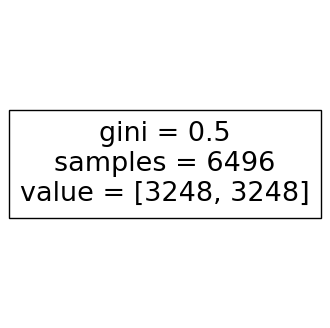

In [12]:
# model with alpha = 0.97
least_complex_tree = clfs[0]

# Plot the tree
plt.figure(figsize=(4,4))
tree.plot_tree(
    least_complex_tree,
    feature_names=X_train.columns.to_list(),
    filled=True
)
plt.show()

### Task 5d

The least complex tree contains only a root node (depth = 0); therefore, no predictor variables are evaluated when classifying a new instance. The values of `nr.employed` = 6000 and `duration = 500` are not used in any decision rule. The observation remains in the root node, and the model predicts the majority class at that node. Since the classes are evenly split, the model defaults to predicting no (class = 0).

In [13]:

instance_5d = X_train.iloc[[0]].copy()
instance_5d.loc[:, "nr.employed"] = 6000
instance_5d.loc[:, "duration"] = 500
prediction = least_complex_tree.predict(instance_5d)
print(prediction)

['no']


## Task 6

In [14]:
# generate and store train and test predictions for all 7 models
for i, clf in enumerate(clfs, start=1):
    globals()[f"train_pred_model_{i}"] = clf.predict(X_train)
    globals()[f"test_pred_model_{i}"]  = clf.predict(X_test)

## Task 7

In [15]:
for i in range(1, 8):
    train_preds = globals()[f"train_pred_model_{i}"]
    test_preds  = globals()[f"test_pred_model_{i}"]

    class_names = y_train.unique()

    print(f"Model {i}")

    # Train
    train_cm_df = pd.DataFrame(
        confusion_matrix(y_train, train_preds),
        index=class_names,
        columns=class_names
    )
    print("Train Confusion Matrix:")
    display(train_cm_df)
    print("Train Classification Report:")
    print(classification_report(y_train, train_preds))

    # Test
    test_cm_df = pd.DataFrame(
        confusion_matrix(y_test, test_preds),
        index=class_names,
        columns=class_names
    )
    print("Test Confusion Matrix:")
    display(test_cm_df)
    print("Test Classification Report:")
    print(classification_report(y_test, test_preds))

    # divider
    print("="*60)


Model 1
Train Confusion Matrix:


,yes,no
yes,3248,0
no,3248,0


Train Classification Report:
              precision    recall  f1-score   support

          no       0.50      1.00      0.67      3248
         yes       0.00      0.00      0.00      3248

    accuracy                           0.50      6496
   macro avg       0.25      0.50      0.33      6496
weighted avg       0.25      0.50      0.33      6496

Test Confusion Matrix:


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,yes,no
yes,1392,0
no,1392,0


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Test Classification Report:
              precision    recall  f1-score   support

          no       0.50      1.00      0.67      1392
         yes       0.00      0.00      0.00      1392

    accuracy                           0.50      2784
   macro avg       0.25      0.50      0.33      2784
weighted avg       0.25      0.50      0.33      2784

Model 2
Train Confusion Matrix:


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,yes,no
yes,3248,0
no,3248,0


Train Classification Report:


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

          no       0.50      1.00      0.67      3248
         yes       0.00      0.00      0.00      3248

    accuracy                           0.50      6496
   macro avg       0.25      0.50      0.33      6496
weighted avg       0.25      0.50      0.33      6496

Test Confusion Matrix:


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,yes,no
yes,1392,0
no,1392,0


Test Classification Report:


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

          no       0.50      1.00      0.67      1392
         yes       0.00      0.00      0.00      1392

    accuracy                           0.50      2784
   macro avg       0.25      0.50      0.33      2784
weighted avg       0.25      0.50      0.33      2784

Model 3
Train Confusion Matrix:


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,yes,no
yes,3248,0
no,3248,0


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Train Classification Report:


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

          no       0.50      1.00      0.67      3248
         yes       0.00      0.00      0.00      3248

    accuracy                           0.50      6496
   macro avg       0.25      0.50      0.33      6496
weighted avg       0.25      0.50      0.33      6496

Test Confusion Matrix:


,yes,no
yes,1392,0
no,1392,0


Test Classification Report:


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

          no       0.50      1.00      0.67      1392
         yes       0.00      0.00      0.00      1392

    accuracy                           0.50      2784
   macro avg       0.25      0.50      0.33      2784
weighted avg       0.25      0.50      0.33      2784

Model 4
Train Confusion Matrix:


,yes,no
yes,2011,1237
no,535,2713


Train Classification Report:
              precision    recall  f1-score   support

          no       0.79      0.62      0.69      3248
         yes       0.69      0.84      0.75      3248

    accuracy                           0.73      6496
   macro avg       0.74      0.73      0.72      6496
weighted avg       0.74      0.73      0.72      6496

Test Confusion Matrix:


,yes,no
yes,840,552
no,227,1165


Test Classification Report:
              precision    recall  f1-score   support

          no       0.79      0.60      0.68      1392
         yes       0.68      0.84      0.75      1392

    accuracy                           0.72      2784
   macro avg       0.73      0.72      0.72      2784
weighted avg       0.73      0.72      0.72      2784

Model 5
Train Confusion Matrix:


,yes,no
yes,2690,558
no,440,2808


Train Classification Report:
              precision    recall  f1-score   support

          no       0.86      0.83      0.84      3248
         yes       0.83      0.86      0.85      3248

    accuracy                           0.85      6496
   macro avg       0.85      0.85      0.85      6496
weighted avg       0.85      0.85      0.85      6496

Test Confusion Matrix:


,yes,no
yes,1144,248
no,200,1192


Test Classification Report:
              precision    recall  f1-score   support

          no       0.85      0.82      0.84      1392
         yes       0.83      0.86      0.84      1392

    accuracy                           0.84      2784
   macro avg       0.84      0.84      0.84      2784
weighted avg       0.84      0.84      0.84      2784

Model 6
Train Confusion Matrix:


,yes,no
yes,2690,558
no,440,2808


Train Classification Report:
              precision    recall  f1-score   support

          no       0.86      0.83      0.84      3248
         yes       0.83      0.86      0.85      3248

    accuracy                           0.85      6496
   macro avg       0.85      0.85      0.85      6496
weighted avg       0.85      0.85      0.85      6496

Test Confusion Matrix:


,yes,no
yes,1144,248
no,200,1192


Test Classification Report:
              precision    recall  f1-score   support

          no       0.85      0.82      0.84      1392
         yes       0.83      0.86      0.84      1392

    accuracy                           0.84      2784
   macro avg       0.84      0.84      0.84      2784
weighted avg       0.84      0.84      0.84      2784

Model 7
Train Confusion Matrix:


,yes,no
yes,2527,721
no,175,3073


Train Classification Report:
              precision    recall  f1-score   support

          no       0.94      0.78      0.85      3248
         yes       0.81      0.95      0.87      3248

    accuracy                           0.86      6496
   macro avg       0.87      0.86      0.86      6496
weighted avg       0.87      0.86      0.86      6496

Test Confusion Matrix:


,yes,no
yes,1076,316
no,74,1318


Test Classification Report:
              precision    recall  f1-score   support

          no       0.94      0.77      0.85      1392
         yes       0.81      0.95      0.87      1392

    accuracy                           0.86      2784
   macro avg       0.87      0.86      0.86      2784
weighted avg       0.87      0.86      0.86      2784



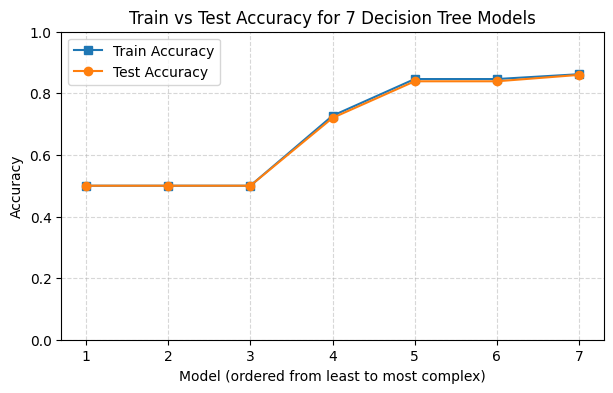

In [17]:

plt.figure(figsize=(7,4))
models = list(range(1, 8))
plt.plot(models, train_scores, marker='s', label='Train Accuracy')
plt.plot(models, test_scores, marker='o', label='Test Accuracy')

plt.xlabel("Model (ordered from least to most complex)")
plt.ylabel("Accuracy")
plt.title("Train vs Test Accuracy for 7 Decision Tree Models")
plt.xticks(models)
plt.ylim(0,1)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()